### ***Exploratory Data Analysis of Riots/Protests in India(2016-2022)***

This dataset contains riots that took place in India along with the actors and geolocations. This record ranges from 2016-to 2022 and has 50,000+ records. This data is collected from ACLED. The Armed Conflict Location & Event Data Project (ACLED) is a non-governmental organization specializing in disaggregated conflict data collection, analysis, and crisis mapping. ACLED codes the dates, actors, locations, fatalities, and types of all reported political violence and demonstration events around the world in real-time. As of 2022, ACLED has recorded more than 1.3 million individual events around the world. The ACLED team conducts analysis to describe, explore, and test conflict scenarios, making both data and analysis open for use by the public.

##### 1. Importing the required libraries for EDA

 Below are the libraries that we require to work on this dataset.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

##### 2. Loading the data into the data frame

Load the dataset into the notebook and get the overview of first and last few rows of the dataset

In [43]:
df=pd.read_csv(r"C:\DATA SCIENCE\DATASETS\protests.csv")
df.head() # First 5 rows


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8912977,356,IND107923,107923.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),...,Kishanpur,25.6422,81.0244,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,1647961433,IND
1,8912990,356,IND107846,107846.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),...,Mumbai - Azad Maidan,18.9388,72.8321,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,1647961433,IND
2,8913012,356,IND107941,107941.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),...,Ahmedgarh,30.6785,75.8272,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,1647961433,IND
3,8913089,356,IND107842,107842.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),...,Indore,22.7179,75.8333,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,1647961433,IND
4,8913091,356,IND107850,107850.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),...,Kanavar,26.5622,78.9797,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,1647961433,IND


In [44]:
# Last 5 rows
df.tail()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
107685,5494159,356,IND9,9.0,01 January 2016,2016,1,Protests,Peaceful protest,Protesters (India),...,Ludhiana,30.9120,75.8537,1,Chandigarh Tribune,Subnational,"On 1 Jan, members of the Punjab Government Con...",0,1618556592,IND
107686,5603486,356,IND51303,51303.0,01 January 2016,2016,1,Battles,Armed clash,NDFB: National Democratic Front of Boroland,...,Kokrajhar,26.4016,90.2665,1,South Asia Terrorism Portal,Other,"On January 1, one surrendered NDFB cadre was k...",1,1563366777,IND
107687,6072644,356,IND49232,49232.0,01 January 2016,2016,1,Protests,Peaceful protest,Protesters (India),...,Pulwama,33.8741,74.9001,2,"Jammu Kashmir Coalition of Civil Society, Srin...",Local partner-Other,"On January 1, a protest took place in Pulwama ...",0,1571164565,IND
107688,6257234,356,IND10,10.0,01 January 2016,2016,1,Battles,Armed clash,CPI (Maoist): Communist Party of India (Maoist),...,Narayanpur,19.7179,81.2443,2,Chandigarh Tribune,National,"On 1 Jan, two Naxals were gunned down and thre...",2,1572403706,IND
107689,8543376,356,IND49233,49233.0,01 January 2016,2016,1,Protests,Peaceful protest,Protesters (India),...,Srinagar,34.0857,74.8056,1,"Jammu Kashmir Coalition of Civil Society, Srin...",Local partner-Other,"On January 1, a protest took place in Srinagar...",0,1631660908,IND


##### 3. Basic information

Getting basic information regarding the dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107690 entries, 0 to 107689
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_id           107690 non-null  int64  
 1   iso               107690 non-null  int64  
 2   event_id_cnty     107690 non-null  object 
 3   event_id_no_cnty  107690 non-null  float64
 4   event_date        107690 non-null  object 
 5   year              107690 non-null  int64  
 6   time_precision    107690 non-null  int64  
 7   event_type        107690 non-null  object 
 8   sub_event_type    107690 non-null  object 
 9   actor1            107690 non-null  object 
 10  assoc_actor_1     76917 non-null   object 
 11  inter1            107690 non-null  int64  
 12  actor2            31375 non-null   object 
 13  assoc_actor_2     11511 non-null   object 
 14  inter2            107690 non-null  int64  
 15  interaction       107690 non-null  int64  
 16  region            10

In [46]:
for i in df:
    df.rename(columns={i:i.capitalize()},inplace=True)

In [47]:
df

,Data_id,Iso,Event_id_cnty,Event_id_no_cnty,Event_date,Year,Time_precision,Event_type,Sub_event_type,Actor1,...,Location,Latitude,Longitude,Geo_precision,Source,Source_scale,Notes,Fatalities,Timestamp,Iso3
0,8912977,356,IND107923,107923.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),...,Kishanpur,25.6422,81.0244,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,1647961433,IND
1,8912990,356,IND107846,107846.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),...,Mumbai - Azad Maidan,18.9388,72.8321,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,1647961433,IND
2,8913012,356,IND107941,107941.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),...,Ahmedgarh,30.6785,75.8272,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,1647961433,IND
3,8913089,356,IND107842,107842.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),...,Indore,22.7179,75.8333,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,1647961433,IND
4,8913091,356,IND107850,107850.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),...,Kanavar,26.5622,78.9797,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,1647961433,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107685,5494159,356,IND9,9.0,01 January 2016,2016,1,Protests,Peaceful protest,Protesters (India),...,Ludhiana,30.9120,75.8537,1,Chandigarh Tribune,Subnational,"On 1 Jan, members of the Punjab Government Con...",0,1618556592,IND
107686,5603486,356,IND51303,51303.0,01 January 2016,2016,1,Battles,Armed clash,NDFB: National Democratic Front of Boroland,...,Kokrajhar,26.4016,90.2665,1,South Asia Terrorism Portal,Other,"On January 1, one surrendered NDFB cadre was k...",1,1563366777,IND
107687,6072644,356,IND49232,49232.0,01 January 2016,2016,1,Protests,Peaceful protest,Protesters (India),...,Pulwama,33.8741,74.9001,2,"Jammu Kashmir Coalition of Civil Society, Srin...",Local partner-Other,"On January 1, a protest took place in Pulwama ...",0,1571164565,IND
107688,6257234,356,IND10,10.0,01 January 2016,2016,1,Battles,Armed clash,CPI (Maoist): Communist Party of India (Maoist),...,Narayanpur,19.7179,81.2443,2,Chandigarh Tribune,National,"On 1 Jan, two Naxals were gunned down and thre...",2,1572403706,IND


##### 4. Searching for duplicate values

Delete if any duplicate rows are found.

In [52]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
107685    False
107686    False
107687    False
107688    False
107689    False
Length: 107690, dtype: bool

##### 5. Handle missing info

In [48]:
df.isnull().sum()

Data_id                 0
Iso                     0
Event_id_cnty           0
Event_id_no_cnty        0
Event_date              0
Year                    0
Time_precision          0
Event_type              0
Sub_event_type          0
Actor1                  0
Assoc_actor_1       30773
Inter1                  0
Actor2              76315
Assoc_actor_2       96179
Inter2                  0
Interaction             0
Region                  0
Country                 0
Admin1                  0
Admin2                 18
Admin3               2239
Location                0
Latitude                0
Longitude               0
Geo_precision           0
Source                  0
Source_scale            0
Notes                   0
Fatalities              0
Timestamp               0
Iso3                    0
dtype: int64

Only 5 columns have missing values. These missing values do not need to be imputed. They are not mistakes in recording the data, the missing value indicates the entry is not relevant for the event.

##### 6. Dropping irrevalant columns

In [49]:
df.drop(columns=['Assoc_actor_1','Actor2','Assoc_actor_2','Admin2','Admin3'],inplace=True)

In [50]:
df.isnull().sum()

Data_id             0
Iso                 0
Event_id_cnty       0
Event_id_no_cnty    0
Event_date          0
Year                0
Time_precision      0
Event_type          0
Sub_event_type      0
Actor1              0
Inter1              0
Inter2              0
Interaction         0
Region              0
Country             0
Admin1              0
Location            0
Latitude            0
Longitude           0
Geo_precision       0
Source              0
Source_scale        0
Notes               0
Fatalities          0
Timestamp           0
Iso3                0
dtype: int64

##### 7. Detailed analysis

***a) Most Occurring Event***

First step is to identify the most occurring event or type of protest in the dataset. Understanding the frequency of different types of events provides insights into the prevalent issues or causes of protests.\
***Data Preparation:***\
_Examined the 'Event_type' column in the dataset, which likely contains categorical data describing the type or nature of each protest event._\
\
***Data Exploration:***\
_Computed the frequency or count of occurrences for each unique event type using method value_counts(). This allows us to identify the most common event types.\
Additionally, we can visualize the distribution of event types using pie chart to gain a better understanding of the relative frequencies._

In [53]:
df['Event_type'].value_counts()

Protests                      79978
Riots                         15415
Battles                        5222
Violence against civilians     4397
Strategic developments         1391
Explosions/Remote violence     1287
Name: Event_type, dtype: int64

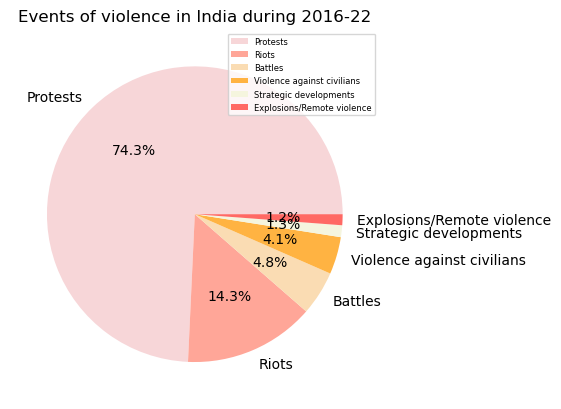

In [54]:
event_count=df['Event_type'].value_counts().reset_index(name="count")
data=event_count['count']
colors=['#f7d6d8','#FFA698','#FADCB3','#ffb342','#f5f5de','#ff6964']
mylabels=['Protests','Riots','Battles','Violence against civilians','Strategic developments','Explosions/Remote violence']
plt.pie(data,labels=mylabels,colors=colors,autopct='%1.1f%%')
plt.title("Events of violence in India during 2016-22",loc='center')
plt.legend(mylabels,fontsize='6',loc='upper right')
plt.show()

***The analysis reveals that protests are the most occurring event in the dataset.*** 

***Frequency of Protests:***\
_The dataset contains a significant number of occurrences of protests(79979 ie,74.3%) compared to other event types.\
This suggests that individuals or groups frequently resort to protests as a means of voicing grievances, advocating for change, or expressing dissent._\
\
***Social or Political Context:***\
_The prevalence of protests underscores the significance of social, political, or economic issues.\
It reflects the existence of various societal challenges, inequalities, or grievances that prompt individuals or groups to mobilize and participate in protests._\
\
***Forms of Activism:***\
_Protests serve as a primary form of activism or collective action, indicating a desire for social or political change.\
The frequency of protests may vary in intensity, scale, or tactics, ranging from peaceful demonstrations to more confrontational or disruptive actions._


***b) Analysis of Subevents Within Events***

In this step, we delve deeper into the events identified in the dataset to analyze their subevents or specific occurrences. Understanding the subevents within each event type provides detailed insights into the characteristics, dynamics, and outcomes of different types of events.

***Grouping by Event Type:***\
_We start by grouping the data by the 'Event_type' column to categorize events into broader event types, such as protests, riots, battles etc._\
\
***Counting Subevent Types:***\
_Within each event type group, we count the occurrences of different subevent types using the 'Sub_event_type' column. This provides a breakdown of the specific actions or manifestations associated with each event type._\
\
***Analysis of Frequency and Distribution:***\
_We analyze the frequency and distribution of subevent types within each event type group. This helps identify the most common subevent types and their relative prevalence within different event categories._\
\
***Comparison Across Event Types:***\
_We compare the distribution of subevent types across different event types to identify similarities or differences in the characteristics of events._\
_This analysis may reveal patterns or trends that differentiate event types and inform our understanding of their dynamics._

In [55]:
sub_event=df.groupby('Event_type')['Sub_event_type'].value_counts()
sub_event

Event_type                  Sub_event_type                    
Battles                     Armed clash                            5220
                            Government regains territory              2
Explosions/Remote violence  Remote explosive/landmine/IED           811
                            Grenade                                 407
                            Shelling/artillery/missile attack        62
                            Suicide bomb                              4
                            Air/drone strike                          3
Protests                    Peaceful protest                      74544
                            Protest with intervention              5226
                            Excessive force against protesters      208
Riots                       Mob violence                           9931
                            Violent demonstration                  5484
Strategic developments      Disrupted weapons use                   627
 

The horizontal bar plot visualizes the distribution of subevents causing violence across different event types. Each bar represents a subevent type, and its length corresponds to the frequency of occurrences within the dataset. The plot provides insights into the prevalence and relative importance of various subevents in contributing to violent incidents.\
\
***Frequency Distribution:***\
_The length of each bar indicates the frequency of occurrences of the corresponding subevent type.\
Subevents with longer bars are more prevalent and occur more frequently in the dataset._\
\
***Identification of Dominant Subevents:***\
_Bars that extend further to the right represent subevents that occur more frequently and have a greater impact on causing violence.\
By examining the longest bars, we can identify the most common and significant subevents contributing to violent incidents._\
\
***Comparison Across Event Types:***\
_The plot allows for the comparison of subevent frequencies across different event types.\
Differences in bar lengths between event types highlight variations in the types and frequencies of subevents leading to violence._

<Axes: title={'center': 'Subevents caused along the violence'}, ylabel='Event_type,Sub_event_type'>

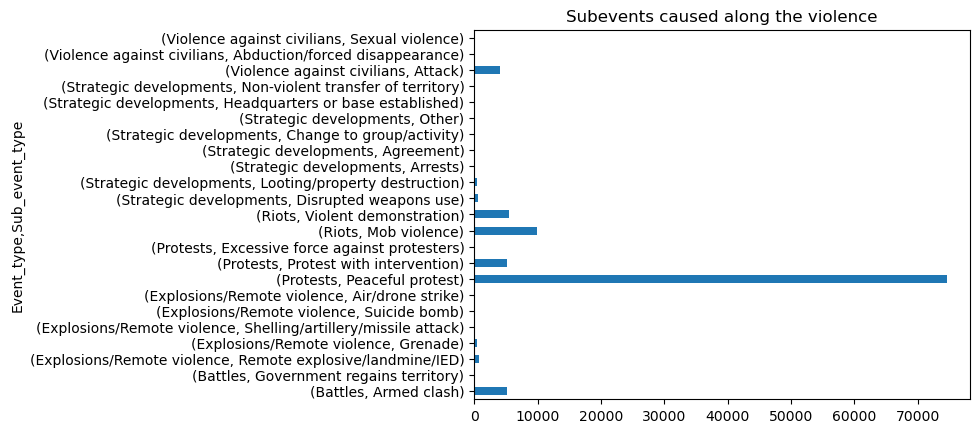

In [20]:
sub_event.plot(kind='barh',title="Subevents caused along the violence")

***The analysis reveals that peaceful protests are the most occurring event type in the dataset, while among riot events, mob violence is predominant.***

***Prevalence of Peaceful Protests:***\
_Peaceful protests emerge as the dominant form of collective action, indicating a prevalent mode of expressing grievances or advocating for change.\
The high frequency of peaceful protests suggests a widespread desire for social or political participation in a nonviolent manner._\
\
***Significance of Mob Violence in Riots:***\
_Within riot events, mob violence stands out as the most occurring subevent type, highlighting the intensity and volatility associated with such incidents.\
Mob violence often involves large groups engaging in violent acts, posing significant challenges to law enforcement and public safety._\
\
***The dominance of peaceful protests underscores the importance of facilitating spaces for peaceful expression and dialogue to address societal issues.***

***c) Fatalities Analysis by Event and Subevent Types***

The horizontal bar plot visualizes the total fatalities associated with different event and subevent types. Each bar represents a combination of event and subevent types, and its length corresponds to the total number of fatalities attributed to that combination.\
\
***Fatalities Distribution:***\
_The length of each bar indicates the total number of fatalities associated with the corresponding event and subevent types.\
Longer bars represent event and subevent combinations with higher fatality counts, indicating a greater impact on loss of life._\
\
***Identification of High-Risk Scenarios:***\
_Bars extending further to the right indicate event and subevent combinations that result in a higher number of fatalities.\
By examining these bars, we can identify high-risk scenarios or situations with a significant loss of life._\
\
***Comparison Across Event and Subevent Types:***\
_The plot allows for the comparison of fatality counts across different event and subevent types.\
Differences in bar lengths highlight variations in the severity of fatalities between event and subevent categories._

In [56]:
fatality=df.groupby(['Event_type','Sub_event_type'])['Fatalities'].sum()
fatality

Event_type                  Sub_event_type                    
Battles                     Armed clash                           4826
                            Government regains territory            29
Explosions/Remote violence  Air/drone strike                         0
                            Grenade                                 48
                            Remote explosive/landmine/IED          363
                            Shelling/artillery/missile attack       26
                            Suicide bomb                            48
Protests                    Excessive force against protesters     100
                            Peaceful protest                         0
                            Protest with intervention                0
Riots                       Mob violence                          1207
                            Violent demonstration                  267
Strategic developments      Agreement                                0
              

<Axes: ylabel='Event_type,Sub_event_type'>

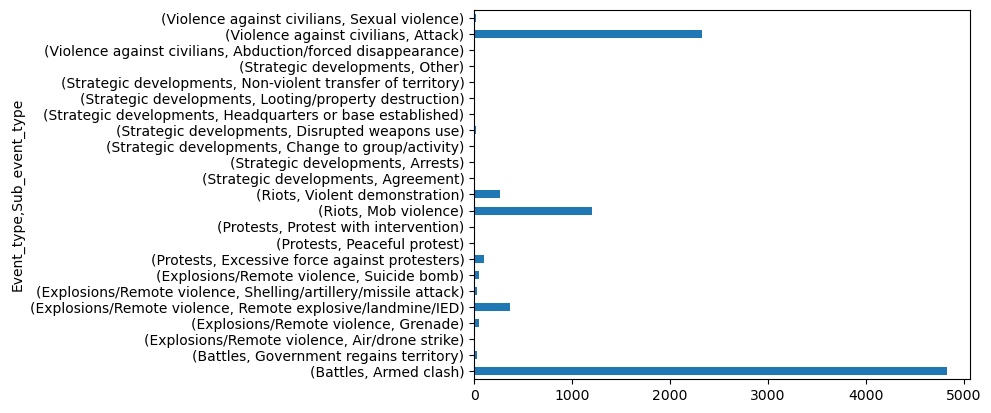

In [22]:
fatality.plot(kind='barh')

***Protests Contribution to Fatalities:***\
_Protests contribute minimally to fatalities, the low fatality rate suggests that protests are predominantly peaceful forms of collective action._\
\
***Fatalities in Armed Clashes:***\
_Armed clashes between two armed forces, such as military and terrorist groups, result in the highest number of fatalities.\
The intensity and violence inherent in armed conflicts contribute to a significantly higher fatality rate compared to other event types._\
\
***Violence Against Civilians:***\
_Violence against civilians ranks as a close second in fatalities, indicating the severity of harm inflicted on civilian populations.\
Acts of violence targeting civilians, such as terrorist attacks or state repression, have substantial repercussions in terms of loss of life._

***d)  Region wise event occurences***

First let's look at just the number of events occuring in various regions

In [23]:
region_event_counts = df.groupby('Admin1').size()
region_event_counts

Admin1
Andaman and Nicobar Islands                   128
Andhra Pradesh                               3437
Arunachal Pradesh                             593
Assam                                        7128
Bihar                                        2659
Chandigarh                                   1252
Chhattisgarh                                 1462
Dadra and Nagar Haveli and Daman and Diu        5
Delhi                                        3167
Goa                                           437
Gujarat                                      1654
Haryana                                      4372
Himachal Pradesh                             1317
Jammu and Kashmir                           18105
Jharkhand                                    2648
Karnataka                                    3839
Kerala                                       2854
Ladakh                                         81
Lakshadweep                                     5
Madhya Pradesh                             

The map visualizes the distribution of event counts across regions in India, providing insights into the geographical variation of collective action events. Each region is shaded according to the number of events it has experienced, with darker shades indicating higher event counts.

***Geographical Distribution of Events:***\
_The map allows for a visual understanding of the spatial distribution of collective action events across different regions of India.\
Darker shades in certain regions indicate higher concentrations of events, while lighter shades represent areas with fewer events._\
\
***Identification of Hotspots:***
_Regions with darker shades on the map signify hotspots of collective action activity, where a significant number of events have occurred.\
Identifying these hotspots can help pinpoint areas of heightened social or political tension and inform targeted interventions or research efforts._\
\
***Regional Disparities:***\
_Contrasts in shading between regions highlight disparities in the occurrence of collective action events across India.\
Analyzing these regional disparities can shed light on underlying socio-economic, political, or cultural factors driving collective action dynamics._

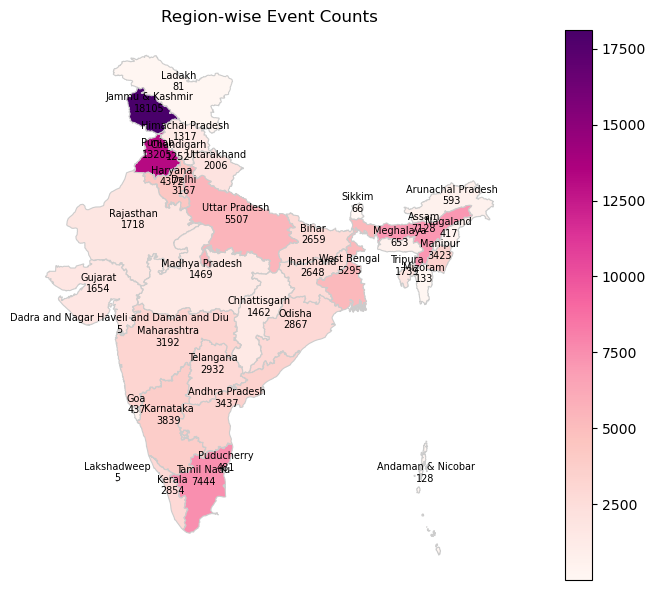

In [24]:
protests = pd.DataFrame({
    'ST_NM': df['Admin1'],  
    'Event_Type': df['Event_type'] ,
    'Fatalities' : df['Fatalities']
})

# Group protests by region and count the number of events in each region
region_event_counts = protests.groupby('ST_NM').size().reset_index(name='Event_Count')
region_event_counts.replace("Jammu and Kashmir","Jammu & Kashmir", inplace=True)
region_event_counts.replace("Andaman and Nicobar Islands","Andaman & Nicobar", inplace=True)
# Load GeoJSON file containing the geographical boundaries of regions

regions_gdf = gpd.read_file(r"https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson")
fig, ax = plt.subplots(figsize=(10, 6))
# Merge the region-wise event counts with the geographical boundaries
merged_gdf = regions_gdf.merge(region_event_counts, on='ST_NM')
for idx, row in merged_gdf.iterrows():
    state_name = row['ST_NM']
    event_count = row['Event_Count']
    ax.annotate(text=f'{state_name}\n{event_count}', xy=row['geometry'].centroid.coords[0], 
                horizontalalignment='center', fontsize=7)



merged_gdf.plot(column='Event_Count', cmap='RdPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Region-wise Event Counts')
plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()


***Event Counts in Jammu and Kashmir:***\
_Jammu and Kashmir records the highest number of events, with a total of 18,105 events documented in the dataset._\
\
***Event Counts in Punjab:***\
_Punjab follows closely behind, ranking second with a total of 13,205 events reported._\
\
***Intensity of Collective Action in Jammu and Kashmir:***\
_The high number of events in Jammu and Kashmir reflects the region's history of socio-political unrest and conflict.\
The prevalence of collective action events underscores the complex dynamics and ongoing tensions in the region._\
\
***Significance of Collective Action in Punjab:***\
_Punjab's substantial number of events indicates the region's active engagement in collective action activities.\
The frequency of events suggests the presence of social or political issues prompting mobilization and activism within the state._

In [58]:
statewise_fatalities=protests.groupby('ST_NM')['Fatalities'].sum().reset_index(name='Fatalities')
statewise_fatalities.replace("Jammu and Kashmir","Jammu & Kashmir", inplace=True)
statewise_fatalities.replace("Andaman and Nicobar Islands","Andaman & Nicobar", inplace=True)


***e) Region wise event Fatalities***

Now let's took a look at fatalities and see if it correlates with event occurences

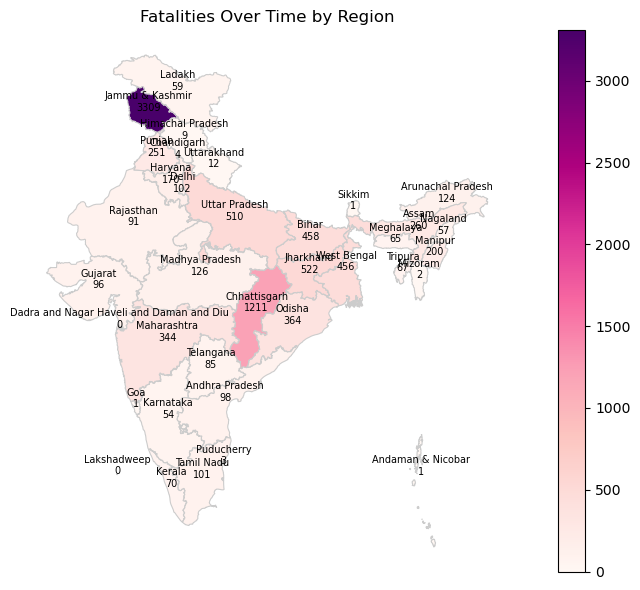

In [26]:
merged_gdf = regions_gdf.merge(statewise_fatalities, on='ST_NM')
fig, ax = plt.subplots(figsize=(10, 6))
for idx, row in merged_gdf.iterrows():
    state_name = row['ST_NM']
    fatalities = row['Fatalities']
    ax.annotate(text=f'{state_name}\n{fatalities}', xy=row['geometry'].centroid.coords[0], 
                horizontalalignment='center', fontsize=7)

merged_gdf.plot(column='Fatalities', cmap='RdPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Fatalities Over Time by Region')
plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()

***Protests/Riots in Punjab with Low Fatalities:***\
_Punjab has witnessed a significant number of protests/riots, yet the fatalities are comparatively lower._\
\
***Violence in Jammu & Kashmir:***\
_Jammu & Kashmir exhibits higher fatalities since having a higher number of events, indicating a more violent nature of conflicts in the region._\
\
***Chattisgarh:***\
_Chattisgarh reports a low number of events, but the fatalities are relatively higher, suggesting that the events occurring in Chattisgarh tend to be more violent._

***The findings highlight the complexity of conflict dynamics, where the number of events alone may not accurately reflect the severity or impact of conflicts.\
Factors such as the nature of conflicts, presence of armed groups, and state responses play significant roles in determining the level of violence and fatalities.***

***f) Occurrences of Event Types Over Time (2016-2022)***

_The analysis reveals the temporal distribution of various event types, such as protests, riots, and battles, from 2016 to 2022._

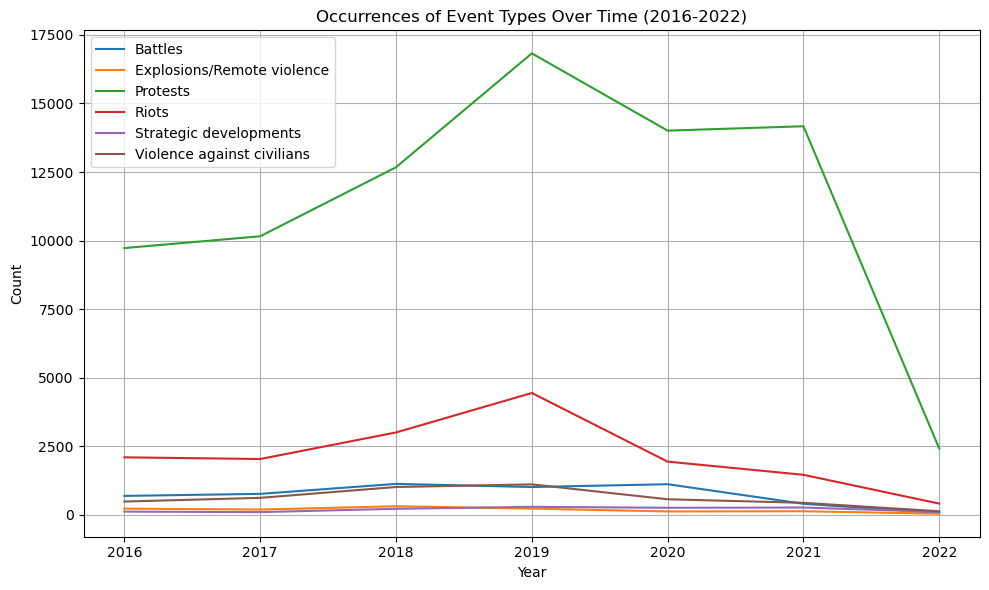

In [59]:
df['Event_date'] = pd.to_datetime(df['Event_date'])
event = pd.DataFrame({
    'Date': df['Event_date'],
    'Event_Type': df['Event_type']
})

# Extract year from the Date column
event['Year'] = event['Date'].dt.year

# Group protests by year and event type
grouped_data = event.groupby(['Year', 'Event_Type']).size().unstack(fill_value=0)

# Plot aggregated line plot
plt.figure(figsize=(10, 6))
for event_type in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[event_type], label=event_type)

plt.title('Occurrences of Event Types Over Time (2016-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(range(2016, 2023)) 
plt.tight_layout()
plt.show()

***Temporal Distribution of Event Types:***\
_Protests and riots primarily occurred in the year 2019, exhibiting higher frequencies compared to other years.\
In contrast, occurrences of battles, explosions/remote violence, strategic developments, and violence against civilians remained relatively constant throughout the years._

***Year of Peak Activity:***\
_The year 2019 emerges as a period of heightened collective action, particularly in the form of protests and riots.\
The concentration of protests and riots in 2019 suggests significant socio-political mobilization and unrest during that period._\
\
***Consistency in Other Event Types:***\
_Despite fluctuations in protests and riots, other event types such as battles, explosions/remote violence, strategic developments, and violence against civilians demonstrate consistent occurrence rates across the years.\
This consistency may indicate ongoing conflicts, security challenges, or structural issues that persist over time._

***g) Fatalities Over Years by State***

Let us examine the distribution of fatalities over the years across different states and union territories.\
_The analysis reveals variations in the number of fatalities across different states over the years.\
Certain states may exhibit higher or lower fatality rates compared to others, indicating varying levels of conflict or violence._


C:\Users\millu\AppData\Local\Temp\ipykernel_5804\4072830929.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fatalities_by_year_state =df.groupby(['Year', 'Admin1']).sum()['Fatalities'].unstack(fill_value=0)


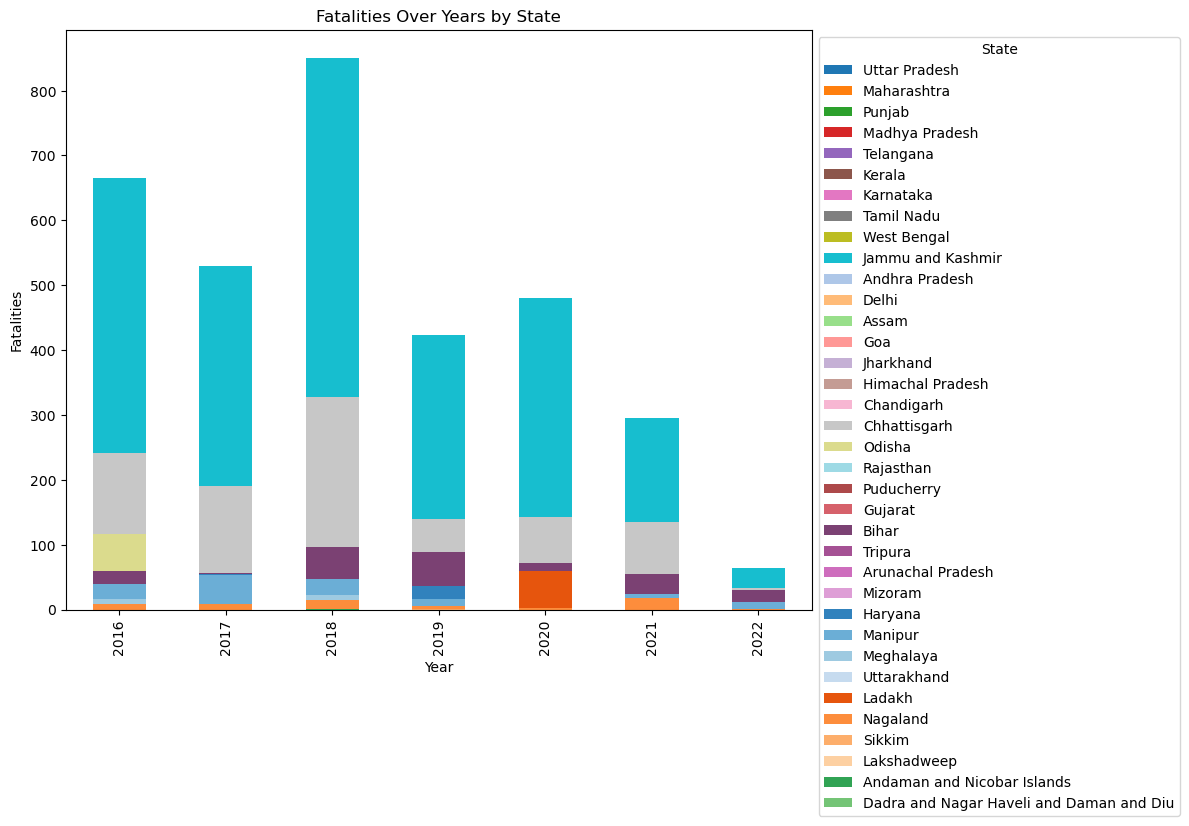

In [60]:
df['Event_date'] = pd.to_datetime(df['Event_date'])

df['Year'] = df['Event_date'].dt.year
states = df['Admin1'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', 
          '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5', '#ad494a', '#d6616b', '#7b4173', '#a55194', 
          '#ce6dbd', '#de9ed6', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', 
          '#fdae6b', '#fdd0a2', '#31a354', '#74c476']
state_color_map = dict(zip(states, colors))

# Group fatalities by year and state, summing them up
fatalities_by_year_state =df.groupby(['Year', 'Admin1']).sum()['Fatalities'].unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))

for state in states:
    fatalities_by_year_state[state].plot(kind='bar', stacked=True, color=state_color_map[state], ax=plt.gca(), label=state)

plt.title('Fatalities Over Years by State')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend(title='State',loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


***Jammu and Kashmir:***\
_Jammu and Kashmir consistently reports the highest number of fatalities throughout the years, indicating a prolonged and severe conflict situation in the region._\
***Chhattisgarh:***\
_Chhattisgarh ranks as the second state with significant fatalities over the years, highlighting persistent violence and conflict dynamics within the state._

***Severity of Conflict in Jammu and Kashmir:***\
_The consistently high number of fatalities in Jammu and Kashmir underscores the severity and protracted nature of the conflict in the region.\
The prolonged conflict situation in Jammu and Kashmir has significant humanitarian implications and underscores the urgent need for conflict resolution and peacebuilding efforts._\
\
***Challenges in Chhattisgarh:***\
_Chhattisgarh's ranking as the second state with substantial fatalities indicates ongoing challenges related to violence and conflict, possibly linked to insurgency or internal security threats.\
The presence of armed groups or insurgency activities in Chhattisgarh underscores the complexities of addressing security and governance issues in conflict-affected regions._

***h) Most Active Group in Each Event***

The analysis identifies the most active group associated with each event, based on the frequency of their participation or involvement.\
The analysis reveals the diversity of groups participating in collective action events, including political parties,armed groups, social movements, ethnic or religious organizations, and other civil society groups.


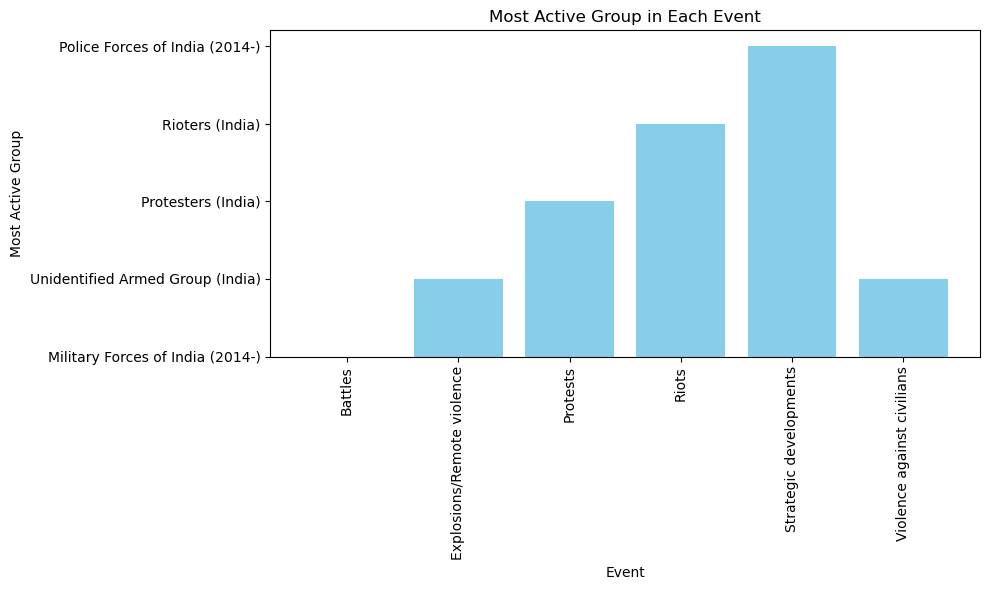

In [63]:
most_active_group_in_event = df.groupby('Event_type')['Actor1'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most Active Group')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(most_active_group_in_event['Event_type'], most_active_group_in_event['Most Active Group'], color='skyblue')
plt.title('Most Active Group in Each Event')
plt.xlabel('Event')
plt.ylabel('Most Active Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***Strategic Developments:***\
_The most active group in strategic developments events is identified as the Police Forces of India._\
\
***Riots:***\
_Rioters (India) emerge as the most active group in riots events._\
\
***Protests:***\
_Protestors (India) are identified as the most active group in protests events._\
\
***Explosions/Remote Violence and Violence Against Civilians:***\
_Unidentified armed groups (India) are the most active group in events categorized as explosions/remote violence and violence against civilians._

The identified groups play pivotal roles in shaping the dynamics and outcomes of specific event types.\
Police forces, rioters, protestors, and unidentified armed groups represent key actors whose actions significantly influence the course of events.

***i) Most Active Group in Each Sub Event***

Now let's analyse the most active group associated with each sub-event, based on the frequency of their participation or involvement.

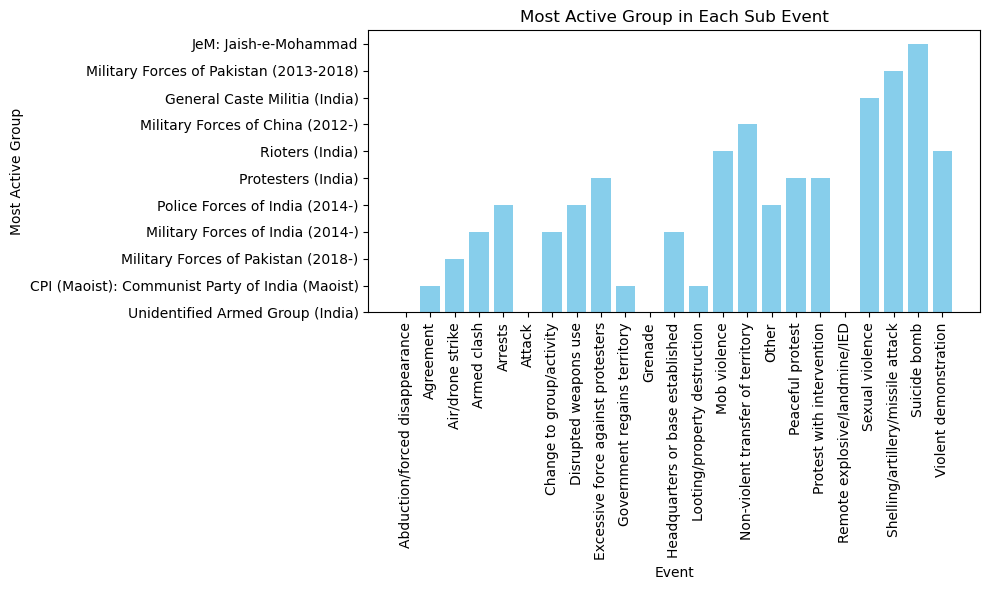

In [62]:
most_active_group_in_subevent = df.groupby('Sub_event_type')['Actor1'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most Active Group')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(most_active_group_in_subevent['Sub_event_type'], most_active_group_in_subevent['Most Active Group'], color='skyblue')
plt.title('Most Active Group in Each Sub Event')
plt.xlabel('Event')
plt.ylabel('Most Active Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***Suicide Bomb:***\
_Jaish-e-Muhammad emerges as the most active group in suicide bomb events during the period of 2013-2018._\
\
***Shelling/Artillery/Missile Attack:***\
_Military forces of Pakistan are identified as the second most active group in shelling/artillery/missile attack events._\
\
***Sexual Violence:***\
_General caste militia (India) ranks third as the most active group in events categorized as sexual violence._\
\
***Non-Violent Transfer of Territory:***\
_Military forces of China are identified as the most active group in non-violent transfer of territory events during the period of 2012-2012._

***Regional and International Dynamics:***\
_The identification of military forces of Pakistan and China in specific sub events suggests the influence of regional and international geopolitical dynamics.\
These dynamics may contribute to the prevalence and nature of certain types of events, such as shelling/artillery/missile attacks and non-violent transfers of territory._

***Security Threats and Challenges:***\
_The activities of Jaish-e-Muhammad and other armed groups underscore the persistent security threats and challenges faced by affected regions.
Addressing these threats requires comprehensive strategies that address both the root causes and immediate manifestations of violence._\
\
***Humanitarian Concerns:***\
_The involvement of groups like the general caste militia in sexual violence events highlights the urgent need to address humanitarian concerns and protect vulnerable populations.
Efforts to prevent and respond to sexual violence must prioritize the safety, well-being, and rights of survivors._

***j) Conclusion***

Through comprehensive exploratory data analysis (EDA) of protests and riots data, several key insights have emerged, shedding light on the dynamics, patterns, and implications of collective action events. Here is a summary of the main findings and their significance:

***Temporal Trends and Patterns:***\
_The analysis revealed temporal trends and patterns in the occurrence of protests and riots over the years, with notable spikes in certain periods, such as 2019.
Understanding these temporal dynamics provides insights into the evolving nature of social mobilization, political activism, and unrest over time._\
\
***Geographical Distribution:***\
_Geospatial analysis highlighted the regional distribution of protests and riots, with certain states experiencing higher frequencies and intensities of events.
Identifying hotspots of activity helps prioritize resources, interventions, and conflict resolution efforts in areas most affected by collective action events._\
\
***Nature of Events:***\
_Classification of events into subcategories, such as protests, riots, strategic developments, and violence against civilians, provided insights into the diverse nature and manifestations of collective action.
Understanding the specific characteristics of each event type informs targeted responses and policy interventions tailored to address underlying grievances and promote social cohesion._\
\
***Role of Actors:***\
_Analysis of the most active groups in different event types and subcategories revealed the complex interplay between state and non-state actors, armed groups, civil society organizations, and other stakeholders.
Understanding the motivations, capabilities, and interactions of key actors is essential for comprehensively addressing conflict dynamics and promoting sustainable peace and stability._\
\
***Impact on Society:***\
_Examination of fatalities, casualties, and humanitarian consequences highlighted the human cost of protests and riots, underscoring the urgent need for conflict prevention, peacebuilding, and humanitarian response efforts.
Efforts to mitigate the impact of violence, protect vulnerable populations, and address underlying grievances are essential for fostering inclusive societies and sustainable development._